<a href="https://colab.research.google.com/github/dhwan-dj/S2-PJT-8th-Local-election/blob/main/S2_PJT_8th_Local_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df3 = pd.read_excel('/content/drive/MyDrive/data/s2 project/rawdata_3.xlsx')

In [ ]:
df3.drop(index=0, inplace=True)
df3.reset_index(drop=True, inplace=True)
df3

,ID,집계구id,집계구번호,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,...,Q26,Q26K1,Q27,Q28,Q28_9997ET,Q29,D1,D2,D3,wt
0,125,20,1117071030008,113,1,70,6,NaN,1,1,...,2,NaN,2,4,NaN,NaN,2,4,4,0.964077
1,127,20,1117071030008,113,1,43,3,NaN,2,1,...,1,2,2,3,NaN,NaN,2,4,5,0.943295
2,128,20,1117071030008,113,1,64,5,NaN,2,1,...,1,2,3,3,NaN,NaN,2,8,4,0.96773
3,129,132,3707054020101,370,2,36,2,NaN,2,1,...,2,NaN,3,1,NaN,NaN,2,5,4,1.000271
4,131,132,3707054020101,370,2,65,5,NaN,1,1,...,1,2,2,2,NaN,국민의식 강화,1,6,2,0.941402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1816,84,3118062010301,312,2,63,5,NaN,2,1,...,2,NaN,2,3,NaN,깨끗하고 공정한 선거,2,8,4,1.039311
1516,1817,30,2103071010101,210,1,64,5,NaN,1,1,...,1,2,2,5,NaN,NaN,3,3,6,0.920366
1517,1818,83,3116052040401,312,2,49,3,NaN,2,1,...,1,3,3,1,NaN,NaN,9999,4,9999,1.065904
1518,1819,16,1117056010205,113,1,58,4,NaN,1,1,...,2,NaN,2,5,NaN,NaN,2,4,5,0.970211


In [ ]:
df3.groupby(by='Q2').mean()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,집계구id,집계구번호,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,D1,D2,D3,wt
Q2,,,,,,,,,,,,,,,,,,,,,
1,963.498674,76.488948,2.670117e+12,266.845270,1.730327,52.445623,3.741821,1.0,1.505747,1.0,...,2.072727,2.434129,1.537577,2.131931,2.397878,29.419098,37.565871,58.301503,172.099027,0.999635
2,1027.771208,73.172237,2.654913e+12,265.526992,1.688946,39.742931,2.493573,1.0,1.508997,1.0,...,2.385965,2.809769,1.740360,2.534653,2.753213,3.156812,79.532134,30.946015,261.485861,1.001062


In [ ]:
# 정제를 위해 df를 복사하고, 모든 값이 결측치인 열은 의미가 없으므로 삭제해준다.
df = df3.copy()
df.dropna(axis=1, how='all', inplace=True)
df

,ID,집계구id,집계구번호,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,...,Q26,Q26K1,Q27,Q28,Q28_9997ET,Q29,D1,D2,D3,wt
0,125,20,1117071030008,113,1,70,6,NaN,1,1,...,2,NaN,2,4,NaN,NaN,2,4,4,0.964077
1,127,20,1117071030008,113,1,43,3,NaN,2,1,...,1,2,2,3,NaN,NaN,2,4,5,0.943295
2,128,20,1117071030008,113,1,64,5,NaN,2,1,...,1,2,3,3,NaN,NaN,2,8,4,0.96773
3,129,132,3707054020101,370,2,36,2,NaN,2,1,...,2,NaN,3,1,NaN,NaN,2,5,4,1.000271
4,131,132,3707054020101,370,2,65,5,NaN,1,1,...,1,2,2,2,NaN,국민의식 강화,1,6,2,0.941402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1816,84,3118062010301,312,2,63,5,NaN,2,1,...,2,NaN,2,3,NaN,깨끗하고 공정한 선거,2,8,4,1.039311
1516,1817,30,2103071010101,210,1,64,5,NaN,1,1,...,1,2,2,5,NaN,NaN,3,3,6,0.920366
1517,1818,83,3116052040401,312,2,49,3,NaN,2,1,...,1,3,3,1,NaN,NaN,9999,4,9999,1.065904
1518,1819,16,1117056010205,113,1,58,4,NaN,1,1,...,2,NaN,2,5,NaN,NaN,2,4,5,0.970211


In [ ]:
# 투표하지 않았다와 수가 같은 결측값을 가지는 컬럼을 드롭한다.
df.drop(columns=['Q2K1','Q3','Q4_1','Q4_3','Q4_4','Q5','Q6','Q8'], inplace=True)

In [ ]:
# 추가적으로 삭제할 열을 살펴본다.
# 직간접적으로 투표여부와 상관관계를 가지는 문항들, 타겟과 무관한 문항
df.drop(columns=['Q3K1','Q3K1_9997ET','Q3K2','Q4_2','Q5_9997ET','Q6_9997ET','Q9','Q29','ID','집계구번호','wt',
                 'Q7K1_1','Q7K1_2','Q7K1_3','Q7K1_4','Q7K1_5','Q7K1_6','Q7K1_7','Q7K1_8','Q7K1_9','Q7K1_9997','Q7K1_9997ET',
                 'Q7K2_1','Q7K2_2','Q7K2_3','Q7K2_4','Q7K2_5','Q7K2_6','Q7K2_7','Q7K2_8','Q7K2_9','Q7K2_9997','Q7K2_9997ET',
                 'Q7K3_1','Q7K3_2','Q7K3_3','Q7K3_4','Q7K3_5','Q7K3_6','Q7K3_7','Q7K3_8','Q7K3_9','Q7K3_9997','Q7K3_9997ET',
                 'Q7K4_1','Q7K4_2','Q7K4_3','Q7K4_4','Q7K4_5','Q7K4_6','Q7K4_7','Q7K4_8','Q7K4_9','Q7K4_9997','Q7K4_9997ET',
                 'Q19','Q20', 'Q20K1','Q20K2','Q20K3','Q20K3_9997ET'
                 ], inplace=True)

In [ ]:
df

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
0,20,113,1,70,6,NaN,1,1,2,2,...,NaN,3,2,NaN,2,4,NaN,2,4,4
1,20,113,1,43,3,NaN,2,1,1,2,...,NaN,3,1,2,2,3,NaN,2,4,5
2,20,113,1,64,5,NaN,2,1,2,2,...,NaN,2,1,2,3,3,NaN,2,8,4
3,132,370,2,36,2,NaN,2,1,4,4,...,NaN,3,2,NaN,3,1,NaN,2,5,4
4,132,370,2,65,5,NaN,1,1,1,1,...,NaN,2,1,2,2,2,NaN,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,84,312,2,63,5,NaN,2,1,1,1,...,NaN,3,2,NaN,2,3,NaN,2,8,4
1516,30,210,1,64,5,NaN,1,1,1,1,...,NaN,2,1,2,2,5,NaN,3,3,6
1517,83,312,2,49,3,NaN,2,1,1,3,...,NaN,3,1,3,3,1,NaN,9999,4,9999
1518,16,113,1,58,4,NaN,1,1,2,2,...,NaN,2,2,NaN,2,5,NaN,2,4,5


In [ ]:
df.fillna(value=0, inplace=True) # 결측치는 설문응답에 사용되지 않는 라벨 0으로 바꾼다.

In [ ]:
df

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
0,20,113,1,70,6,0,1,1,2,2,...,0,3,2,0,2,4,0,2,4,4
1,20,113,1,43,3,0,2,1,1,2,...,0,3,1,2,2,3,0,2,4,5
2,20,113,1,64,5,0,2,1,2,2,...,0,2,1,2,3,3,0,2,8,4
3,132,370,2,36,2,0,2,1,4,4,...,0,3,2,0,3,1,0,2,5,4
4,132,370,2,65,5,0,1,1,1,1,...,0,2,1,2,2,2,0,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,84,312,2,63,5,0,2,1,1,1,...,0,3,2,0,2,3,0,2,8,4
1516,30,210,1,64,5,0,1,1,1,1,...,0,2,1,2,2,5,0,3,3,6
1517,83,312,2,49,3,0,2,1,1,3,...,0,3,1,3,3,1,0,9999,4,9999
1518,16,113,1,58,4,0,1,1,2,2,...,0,2,2,0,2,5,0,2,4,5


In [ ]:
df.Q2.value_counts(normalize=True)

1    0.744079
2    0.255921
Name: Q2, dtype: float64

In [ ]:
df1 = df.loc[df.Q2 ==1]
df1.reset_index(drop=True, inplace=True)
df1

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
0,20,113,1,43,3,0,2,1,1,2,...,0,3,1,2,2,3,0,2,4,5
1,20,113,1,64,5,0,2,1,2,2,...,0,2,1,2,3,3,0,2,8,4
2,132,370,2,65,5,0,1,1,1,1,...,0,2,1,2,2,2,0,1,6,2
3,132,370,2,70,6,0,2,1,1,1,...,0,2,2,0,1,3,0,1,10,2
4,20,113,1,57,4,0,1,1,1,1,...,0,3,2,0,3,3,0,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,134,370,2,74,6,0,1,1,3,1,...,0,2,2,0,2,3,0,1,6,2
1127,84,312,2,63,5,0,2,1,1,1,...,0,3,2,0,2,3,0,2,8,4
1128,30,210,1,64,5,0,1,1,1,1,...,0,2,1,2,2,5,0,3,3,6
1129,83,312,2,49,3,0,2,1,1,3,...,0,3,1,3,3,1,0,9999,4,9999


In [ ]:
df2 = df.loc[df.Q2 ==2]
df2.reset_index(drop=True, inplace=True)
df2

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
0,20,113,1,70,6,0,1,1,2,2,...,0,3,2,0,2,4,0,2,4,4
1,132,370,2,36,2,0,2,1,4,4,...,0,3,2,0,3,1,0,2,5,4
2,83,312,2,39,2,0,1,1,3,3,...,0,4,2,0,3,2,0,3,4,9999
3,83,312,2,45,3,0,1,1,3,3,...,0,3,1,3,3,5,0,2,4,3
4,76,311,3,31,2,0,1,1,1,2,...,3,3,2,0,2,3,0,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,46,220,1,32,2,0,2,1,3,3,...,0,3,2,0,3,3,0,3,2,6
385,46,220,1,22,1,0,2,1,3,3,...,0,3,1,3,3,3,0,3,9,5
386,46,220,1,51,4,0,1,1,3,4,...,0,4,2,0,4,3,0,2,10,4
387,46,220,1,37,2,0,1,1,3,3,...,0,4,2,0,3,3,0,3,4,4


In [ ]:
from sklearn.utils import resample

# 투표 그룹(df1)을 10180명으로 늘리기 위한 부트스트랩
df1_index = [i for i in df1.index]

list_of_df = []
for k in range(509):
  bootstrap = resample(df1_index, replace = True, n_samples = 20)
  df_temp = df1.iloc[bootstrap]
  list_of_df.append(df_temp) # 매 Loop에서 취해진 DataFrame을 위의 list에 적재함.

df_accum = pd.concat(list_of_df) # list 속 DataFrame들을 일괄 병합함.

In [ ]:
df_accum #투표한 그룹

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
277,140,380,2,59,4,0,1,1,2,1,...,2,2,1,2,2,3,0,2,7,4
1075,74,311,2,42,3,0,2,1,1,2,...,0,2,2,0,3,3,0,2,8,4
569,144,380,2,77,6,0,2,1,2,2,...,2,2,1,2,2,5,0,1,10,1
789,145,380,3,56,4,0,1,1,1,1,...,0,2,2,0,2,1,0,2,5,5
970,45,220,1,78,6,0,1,1,1,1,...,0,2,1,2,2,4,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,30,210,1,46,3,0,1,1,1,1,...,0,2,1,2,2,3,0,2,10,2
998,128,360,3,52,4,0,2,1,2,2,...,1,2,1,2,2,1,0,2,2,3
97,11,112,1,49,3,0,2,1,1,1,...,2,2,2,0,3,5,0,3,1,7
300,115,340,2,78,6,0,2,1,2,2,...,0,3,1,3,3,4,0,1,8,1


In [ ]:
# 미투표 그룹(df2)을 9820명으로 늘리기 위한 부트스트랩
df2_index = [i for i in df2.index]

list_of_df2 = []
for k in range(491):
  bootstrap2 = resample(df2_index, replace = True, n_samples = 20)
  df_temp2 = df2.iloc[bootstrap2]
  list_of_df2.append(df_temp2) # 매 Loop에서 취해진 DataFrame을 위의 list에 적재함.

df_accum2 = pd.concat(list_of_df2) # list 속 DataFrame들을 일괄 병합함.

In [ ]:
df_accum2

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
346,127,360,2,29,1,0,1,1,4,4,...,0,3,2,0,3,4,0,2,5,3
120,24,114,1,47,3,0,2,1,3,3,...,0,3,2,0,3,5,0,2,4,6
383,42,220,1,37,2,0,2,1,3,3,...,0,3,2,0,3,3,0,3,2,5
161,104,313,3,49,3,0,2,1,3,3,...,1,1,1,2,2,4,0,2,4,6
180,100,313,2,55,4,0,2,1,3,2,...,0,3,1,3,3,4,0,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,85,312,2,24,1,0,2,1,2,3,...,0,4,2,0,3,3,0,2,5,6
71,6,112,1,32,2,0,2,1,2,3,...,0,4,2,0,3,4,0,2,5,5
298,102,313,2,72,6,0,2,1,1,2,...,0,3,2,0,3,5,0,1,8,3
335,62,250,1,25,1,0,2,1,3,3,...,0,3,2,0,3,5,0,2,5,3


In [ ]:
df = pd.concat([df_accum,df_accum2])
df.reset_index(drop=True, inplace=True)
df

,집계구id,할당지역code,S2,SQ1_1,SQ1A,SQ1K1,SQ2,MG1,Q1_1,Q1_2,...,Q24K8K1_1,Q25,Q26,Q26K1,Q27,Q28,Q28_9997ET,D1,D2,D3
0,140,380,2,59,4,0,1,1,2,1,...,2,2,1,2,2,3,0,2,7,4
1,74,311,2,42,3,0,2,1,1,2,...,0,2,2,0,3,3,0,2,8,4
2,144,380,2,77,6,0,2,1,2,2,...,2,2,1,2,2,5,0,1,10,1
3,145,380,3,56,4,0,1,1,1,1,...,0,2,2,0,2,1,0,2,5,5
4,45,220,1,78,6,0,1,1,1,1,...,0,2,1,2,2,4,0,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,85,312,2,24,1,0,2,1,2,3,...,0,4,2,0,3,3,0,2,5,6
19996,6,112,1,32,2,0,2,1,2,3,...,0,4,2,0,3,4,0,2,5,5
19997,102,313,2,72,6,0,2,1,1,2,...,0,3,2,0,3,5,0,1,8,3
19998,62,250,1,25,1,0,2,1,3,3,...,0,3,2,0,3,5,0,2,5,3


In [ ]:
df.Q2.value_counts(normalize=True) # 실제 투표율을 재현했다.

1    0.509
2    0.491
Name: Q2, dtype: float64

In [ ]:
df.Q2.value_counts()

1    10180
2     9820
Name: Q2, dtype: int64

In [ ]:
# 2020년 국회의원선거 투표율 66.2, 2022년 대통령선거 투표율 77.1 (https://www.index.go.kr/unify/idx-info.do?idxCd=4268)
# 가상 목표는 최근 4회 평균 투표율을 회복하는 것(55.6%) 그를 위해 필요한 투표자 수
total = len(df)

turnout_goal = int(total * 0.556)
turnout_goal

11120

In [ ]:
turnout_goal-10180   # 투표율 달성 목표시 부족인원

940

In [ ]:
from sklearn.model_selection import train_test_split

# 8:2 비율로 학습/테스트 데이터를 분리합니다.
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               stratify=df['Q2'], random_state=2)
train.shape, test.shape

((16000, 91), (4000, 91))

In [ ]:
# 타겟은 Q2(투표 여부)입니다. 1: 투표, 2: 투표x
target = 'Q2'

X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [ ]:
y_train.value_counts(normalize=True) # 타겟 라벨 비율 확인

1    0.509
2    0.491
Name: Q2, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

1    0.509
2    0.491
Name: Q2, dtype: float64

In [ ]:
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.feature_selection import f_regression, SelectKBest

from sklearn.pipeline import make_pipeline

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
# 기본모델(Baseline) : 로지스틱회귀, 인코더 3개 비교
pipe_ord_lr = make_pipeline(
    OrdinalEncoder(),
    LogisticRegression(n_jobs=-1)
)

pipe_one_lr = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(n_jobs=-1)
)

pipe_tar_lr = make_pipeline(
    TargetEncoder(),
    LogisticRegression(n_jobs=-1)
)

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
# 로지스틱회귀 세가지 모델의 평균 정확도 비교
# 타겟 및 데이터 편향이 있는 편이므로 계층별 k-fold 교차검증을 실시해준다.(StratifiedKFold)

k = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
k2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
k3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(pipe_ord_lr, X_train, y_train, cv=k, 
                         scoring='accuracy')
scores2 = cross_val_score(pipe_one_lr, X_train, y_train, cv=k2, 
                         scoring='accuracy')
scores3 = cross_val_score(pipe_tar_lr, X_train, y_train, cv=k3, 
                         scoring='accuracy')

print(f'Mean Accuracy for 5 folds (Ordinal + LR): ', np.round(scores.mean(),4))
print(f'Mean Accuracy for 5 folds (OneHot + LR): ', np.round(scores2.mean(),4))
print(f'Mean Accuracy for 5 folds (Target + LR): ', np.round(scores3.mean(),4))

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: F

Mean Accuracy for 5 folds (Ordinal + LR):  0.8249
Mean Accuracy for 5 folds (OneHot + LR):  0.8284
Mean Accuracy for 5 folds (Target + LR):  0.8279


In [ ]:
# 랜덤포레스트(class_weight="balanced") + 인코더 3가지 (설문조사도 항목간 정도가 있어서 순서형이 제일 좋을것 같다.)
pipe_ord_RF = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2, class_weight="balanced", n_jobs=-1, oob_score=True)
)

pipe_one_RF = make_pipeline(
    OneHotEncoder(),
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2, class_weight="balanced", n_jobs=-1, oob_score=True)
)

pipe_tar_RF = make_pipeline(
    TargetEncoder(min_samples_leaf=1, smoothing=1),
    RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2, class_weight="balanced", n_jobs=-1, oob_score=True)
)

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
# 랜덤포레스트 세가지 모델의 평균 정확도 비교
# 타겟 및 데이터 편향이 있는 편이므로 계층별 k-fold 교차검증을 실시해준다.(StratifiedKFold)

k = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
k2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
k3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(pipe_ord_RF, X_train, y_train, cv=k, 
                         scoring='accuracy')
scores2 = cross_val_score(pipe_one_RF, X_train, y_train, cv=k2, 
                         scoring='accuracy')
scores3 = cross_val_score(pipe_tar_RF, X_train, y_train, cv=k3, 
                         scoring='accuracy')

print(f'Mean Accuracy for 5 folds (Ordinal + RF): ', np.round(scores.mean(),4))
print(f'Mean Accuracy for 5 folds (OneHot + RF): ', np.round(scores2.mean(),4))
print(f'Mean Accuracy for 5 folds (Target + RF): ', np.round(scores3.mean(),4))

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: F

Mean Accuracy for 5 folds (Ordinal + RF):  0.8454
Mean Accuracy for 5 folds (OneHot + RF):  0.8445
Mean Accuracy for 5 folds (Target + RF):  0.8454


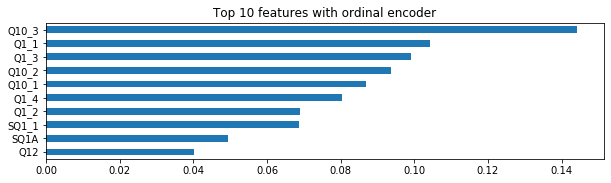

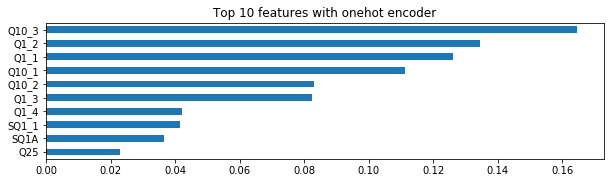

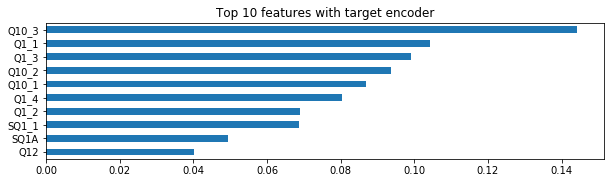

In [ ]:
# 특성 중요도(Ordinal+RF)
pipe_ord_RF.fit(X_train, y_train)
rf_ord = pipe_ord_RF.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with ordinal encoder')
importances_ord.sort_values()[-n:].plot.barh();

# 특성 중요도(Onehot+RF)
pipe_one_RF.fit(X_train, y_train)
rf = pipe_one_RF.named_steps['randomforestclassifier']
colnames = pipe_one_RF.named_steps['onehotencoder'].get_feature_names()
importances = pd.Series(rf.feature_importances_, colnames)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with onehot encoder')
importances.sort_values()[-n:].plot.barh();

# 특성 중요도(Target+RF)
pipe_tar_RF.fit(X_train, y_train)
rf_ord = pipe_tar_RF.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf_ord.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with target encoder')
importances_ord.sort_values()[-n:].plot.barh();

In [ ]:
# Q10_3 : 선거에서 내 한 표는 결과에 중요한 영향을 미친다
# Q10_1 : 선거를 통해서 국가 전체의 미래가 달라질 수 있다
# Q1_2 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 2) 기초단체장
# Q9 : 귀하께서는 한국선거방송을 통해 제공하는 선거 정보가 얼마나 도움이 되었다고 생각하십니까?

# Q1_1 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 1) 광역단체장
# Q10_3 : 선거에서 내 한 표는 결과에 중요한 영향을 미친다
# Q9 : 귀하께서는 한국선거방송을 통해 제공하는 선거 정보가 얼마나 도움이 되었다고 생각하십니까?
# SQ1_1 : 나이

In [ ]:
# 일단은 가장 좋은 결과를 낸 타겟인코더+랜더포레스트의 하이퍼파라미터 튜닝 : 20분 15초 걸림
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    RandomForestClassifier(random_state=2, class_weight="balanced", n_jobs=-1)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,100.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'randomforestclassifier__n_estimators': randint(100, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, None], 
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='accuracy',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);
print('최적 하이퍼파라미터: ', clf.best_params_)

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: F

Fitting 3 folds for each of 50 candidates, totalling 150 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.03285110578430983, 'randomforestclassifier__n_estimators': 139, 'targetencoder__min_samples_leaf': 6, 'targetencoder__smoothing': 50.0}


In [ ]:
print('Accuracy: ', clf.best_score_) #너무 높다..

Accuracy:  1.0


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

,34,8,48,14,28,3,25,26,29,0,...,31,15,6,16,36,35,17,2,39,41
mean_fit_time,1.75249,3.205751,7.699611,2.677519,3.976072,3.416181,28.965402,30.386241,10.949378,4.873167,...,6.067332,7.091144,12.299802,4.769619,11.396098,10.645954,8.273857,25.136186,11.603016,2.022069
std_fit_time,0.045388,0.011742,0.081287,0.035023,0.091967,0.096994,0.31934,0.153381,0.095292,0.204119,...,0.192695,0.140928,0.065936,0.037395,0.142341,0.129038,0.030015,0.940406,0.191732,0.177268
mean_score_time,0.374121,0.529558,0.885163,0.292474,0.455859,0.370148,0.751673,0.902934,0.362804,0.265721,...,0.813509,0.304402,0.397946,0.300404,0.565333,0.320366,0.327237,0.637752,0.332562,0.307735
std_score_time,0.025881,0.028285,0.054144,0.018059,0.031284,0.037831,0.076869,0.034131,0.024079,0.023565,...,0.019689,0.033487,0.01953,0.003774,0.067502,0.010229,0.009828,0.032164,0.043417,0.033119
param_randomforestclassifier__max_depth,None,15,15,None,15,15,15,None,None,None,...,10,5,5,5,5,5,5,5,5,5
param_randomforestclassifier__max_features,0.032851,0.044877,0.109117,0.114154,0.128331,0.163972,0.861745,0.740547,0.833785,0.40212,...,0.0822,0.595053,0.836354,0.267624,0.421455,0.850112,0.554498,0.962912,0.926889,0.022343
param_randomforestclassifier__n_estimators,139,226,461,141,202,146,367,433,138,110,...,408,220,286,260,469,249,270,489,247,254
param_targetencoder__min_samples_leaf,6,4,8,7,7,6,2,6,4,5,...,6,1,8,5,3,1,4,7,1,4
param_targetencoder__smoothing,50.0,2.0,50.0,100.0,100.0,100.0,50.0,100.0,20.0,50.0,...,100.0,50.0,2.0,100.0,100.0,100.0,100.0,100.0,20.0,50.0
params,"{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': None, 'r...","{'randomforestclassifier__max_depth': None, 'r...",...,"{'randomforestclassifier__max_depth': 10, 'ran...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand..."


In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# f1 score
y_train_pred = pipe.predict(X_train)
print('훈련 f1 score: ', f1_score(y_train, y_train_pred))

훈련 f1 score:  1.0


In [ ]:
#테스트 데이터를 예측해본다.
y_pred = pipe.predict(X_test)
print('테스트 f1 score: ', f1_score(y_test, y_pred))
print('테스트 정확도: ', accuracy_score(y_test, y_pred))

테스트 f1 score:  1.0
테스트 정확도:  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


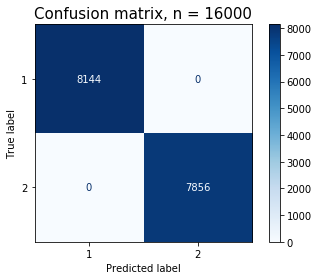

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_train, y_train,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_train)}', fontsize=15)
plt.show()
# 잘못 판단하는게 아예 없다. 이거 누수인가.. 누수겠지..

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text

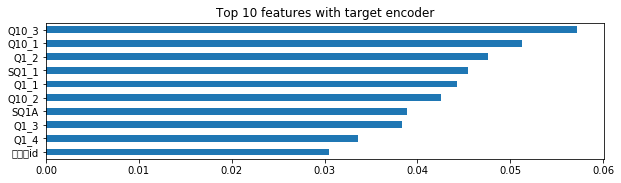

In [ ]:
# 특성 중요도(Ordinal+RF)
rf = pipe.named_steps['randomforestclassifier']
importances_tar = pd.Series(rf.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with target encoder')
importances_tar.sort_values()[-n:].plot.barh();

In [ ]:
# Q10_3 : 선거에서 내 한 표는 결과에 중요한 영향을 미친다
# Q1_2 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 2) 기초단체장
# Q10_1 : 선거를 통해서 국가 전체의 미래가 달라질 수 있다
# SQ1_1 : 나이

# Q1_1 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 1) 광역단체장
# Q1_3 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 3) 지방의원
# Q10_2 : 선거를 통해서 나의 일상생활과 삶의 질이 달라질 수 있다

# 집계구id : 지역
# SQ1A : 응답자연령대
# Q1_4 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 4) 교육감

In [ ]:
# 훈련세트를 다시 8:2 비율로 훈련, 검증으로 분리합니다.
train2, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                               stratify=train['Q2'], random_state=2)
train2.shape, val.shape

((12800, 91), (3200, 91))

In [ ]:
X_train2 = train.drop(columns=target)
y_train2 = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

In [ ]:
from sklearn.metrics import classification_report
y_val_pred = pipe.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1629
           2       1.00      1.00      1.00      1571

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

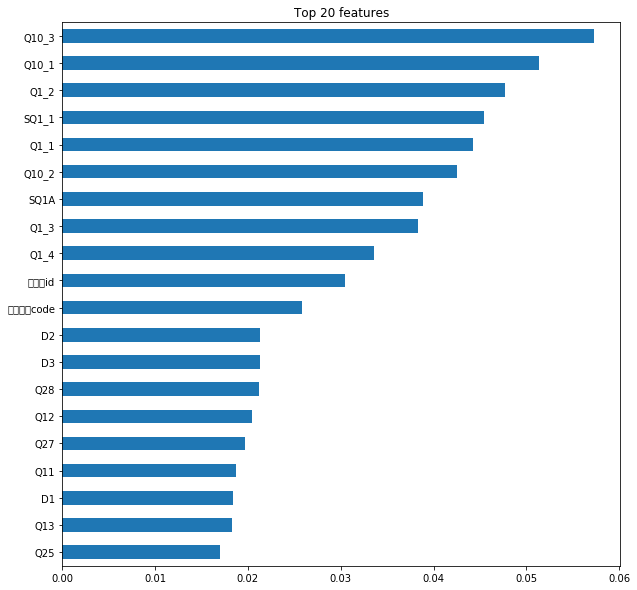

In [ ]:
# 특성 중요도 / Feature Importances(Mean decrease impurity, MDI)
rf = pipe.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
# Q10_1 : 선거를 통해서 국가 전체의 미래가 달라질 수 있다
# SQ1_1 : 나이
# Q10_3 : 선거에서 내 한 표는 결과에 중요한 영향을 미친다
# Q1_2 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 2) 기초단체장
# Q9 : 귀하께서는 한국선거방송을 통해 제공하는 선거 정보가 얼마나 도움이 되었다고 생각하십니까?

# Q1_1 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 1) 광역단체장
# Q10_2 : 선거를 통해서 나의 일상생활과 삶의 질이 달라질 수 있다
# Q1_3 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 3) 지방의원
# SQ1A : 응답자연령대
# Q1_4 : 귀하께서는 지난 6월 1일에 실시된 전국동시지방선거에 얼마나 관심이 있었습니까? 4) 교육감